# The Hopfield Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1), (0, 0, 0)]  # (white, black)
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

In [2]:
class HopfieldModel:
    
    def __init__(self, N=8, M=3, init="close"):
        self.N = N # number of neurons
        self.M = M # number of patterns to remember
        
        # patterns for recognition
        self.patterns = np.zeros((self.N, self.M))
        self.patterns[:,0] = np.array([1, 1, 1, -1, 1, -1, 1, -1])
        self.patterns[:,1] = np.array([-1, 1, -1, -1, 1, 1, -1, 1])
        self.patterns[:,2] = np.array([-1, -1, -1, 1, 1, -1, 1, 1])
        
        # network initialization
        if init == "close": # pattern close to one of stored patterns
            self.network = np.copy(self.patterns[:,np.random.choice(self.M)]).reshape(self.N,1)*np.random.choice([-1, 1], size=(self.N, 1), p=[0.2, 0.8])
        elif init == "random": # random pattern
            self.network = np.random.choice([-1, 1], size=(self.N, 1))
        
        # weight initialization
        c = 1/self.N
        self.weights = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                self.weights[i, j] = sum(self.patterns[i,:]*self.patterns[j,:])
        self.weights = c*self.weights

    def overlap(self):
        m = np.zeros((1, self.M))
        for j in range(self.M):
            m[0, j] = 1/self.N * sum(self.patterns[:,j]*self.network[:,0])
        return m
    
    def input_potential(self):
        h = np.zeros((self.N, 1))
        for i in range(self.N):
            h[i, 0] = sum(self.weights[i,:]*self.network[:,0])
        return h
    
    def pattern_retrieval(self):
        h = self.input_potential()
        for i in range(self.N):
            # deterministic case, beta -> inf
            if h[i,0] > 0:
                self.network[i,0] = 1
            else:
                self.network[i,0] = -1

        
    def simulation(self, T=10):
        print("***** THE HOPFIELD MODEL SIMULATION *****")
        print(f"step {0}, overlap {self.overlap()}")
        self.show(self.network)
        prev_state = np.copy(self.network)
        self.pattern_retrieval()
        
        for n in range(T):
            print(f"step {n+1}, overlap {self.overlap()}")
            self.show(self.network)
            if np.all(prev_state == self.network):
                print(f"converged after {n} steps")
                break
            prev_state = np.copy(self.network)
            self.pattern_retrieval()

    def show(self, X):
        plt.imshow(X.reshape(1, self.N), cmap=custom_cmap)
        # Remove xticks and yticks
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.show()
        
    def show_patterns(self):
        print("***** MEMORIZED PATTERNS *****")
        for j in range(self.M):
            print(f"pattern {j}")
            self.show(self.patterns[:,j])

***** MEMORIZED PATTERNS *****
pattern 0


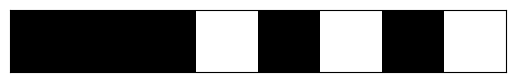

pattern 1


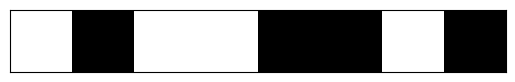

pattern 2


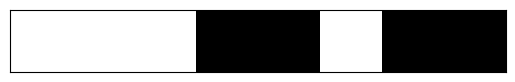

***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[ 0.5  -0.25 -0.25]]


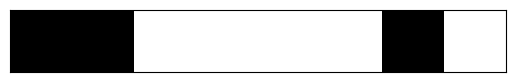

step 1, overlap [[ 0.75 -0.5  -0.5 ]]


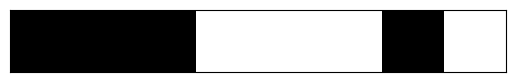

step 2, overlap [[ 0.75 -0.5  -0.5 ]]


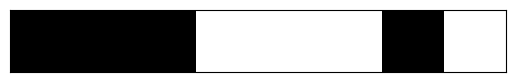

converged after 1 steps


In [3]:
# 1D model
model = HopfieldModel()
model.show_patterns()
model.simulation()

In [26]:
class HopfieldModel2D:
    
    def __init__(self, dim1=10, dim2=6, M=3, init="close"):
        self.dim1 = dim1
        self.dim2 = dim2
        self.N = dim1*dim2 # number of neurons
        self.M = M # number of patterns to remember
        
        # patterns for recognition
        self.patterns = np.zeros((self.N, self.M))
        self.patterns[:,0] = np.array([-1, 1, 1, 1, 1, -1, # digit 0
                                       -1, 1, 1, 1, 1, -1,
                                       1, 1, -1, -1, 1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       1, -1, -1, -1, -1, 1,
                                       1, -1, -1, -1, -1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       -1, 1, 1, 1, 1, -1,
                                       -1, 1, 1, 1, 1, -1])
        self.patterns[:,1] = np.array([-1, -1, 1, 1, -1, -1, # digit 1
                                       -1, 1, 1, 1, -1, -1,
                                       1, 1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       1, 1, 1, 1, 1, 1])
        self.patterns[:,2] = np.array([-1, 1, 1, 1, 1, -1, # digit 2
                                       1, 1, 1, 1, 1, 1,
                                       1, 1, -1, -1, 1, 1,
                                       -1, -1, -1, -1, 1, 1, 
                                       -1, -1, -1, -1, 1, 1,
                                       -1, -1, -1, 1, 1, -1,
                                       -1, -1, 1, 1, -1, -1,
                                       -1, 1, 1, -1, -1, -1,
                                       1, 1, 1, 1, 1, 1,
                                       1, 1, 1, 1, 1, 1])
        
        # network initialization
        if init == "close": # pattern close to one of stored patterns
            self.network = np.copy(self.patterns[:,np.random.choice(self.M)]).reshape(self.N,1)*np.random.choice([-1, 1], size=(self.N, 1), p=[0.2, 0.8])
        elif init == "random": # random pattern
            self.network = np.random.choice([-1, 1], size=(self.N, 1))
        elif init == "2step":
            print("***** INITIALIZATION *****")
            network_init = HopfieldModel2D(init="random")
            network_init.simulation()
            self.network = np.copy(network_init.network)*np.random.choice([-1, 1], size=(self.N, 1), p=[0.2, 0.8])
        
        # weight initialization
        c = 1/self.N
        self.weights = np.zeros((self.N, self.N))
        for i in range(self.N):
            for j in range(self.N):
                self.weights[i, j] = sum(self.patterns[i,:]*self.patterns[j,:])
        self.weights = c*self.weights

    def overlap(self):
        m = np.zeros((1, self.M))
        for j in range(self.M):
            m[0, j] = 1/self.N * sum(self.patterns[:,j]*self.network[:,0])
        return m
    
    def input_potential(self):
        h = np.zeros((self.N, 1))
        for i in range(self.N):
            h[i, 0] = sum(self.weights[i,:]*self.network[:,0])
        return h
    
    def pattern_retrieval(self):
        h = self.input_potential()
        for i in range(self.N):
            # deterministic case, beta -> inf
            if h[i,0] > 0:
                self.network[i,0] = 1
            else:
                self.network[i,0] = -1

    def simulation(self, T=10):
        print("***** THE HOPFIELD MODEL SIMULATION *****")
        print(f"step {0}, overlap {self.overlap()}")
        self.show(self.network)
        prev_state = np.copy(self.network)
        self.pattern_retrieval()
        
        for n in range(T):
            print(f"step {n+1}, overlap {self.overlap()}")
            self.show(self.network)
            if np.all(prev_state == self.network):
                print(f"converged after {n} steps")
                break
            prev_state = np.copy(self.network)
            self.pattern_retrieval()

    def show(self, X):
        plt.imshow(X.reshape(self.dim1, self.dim2), cmap=custom_cmap)
        # Remove xticks and yticks
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])
        plt.show()
        
    def show_patterns(self):
        print("***** MEMORIZED PATTERNS *****")
        for j in range(self.M):
            print(f"pattern {j}")
            self.show(self.patterns[:,j])

***** MEMORIZED PATTERNS *****
pattern 0


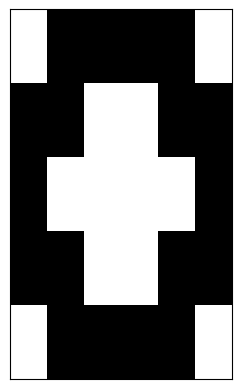

pattern 1


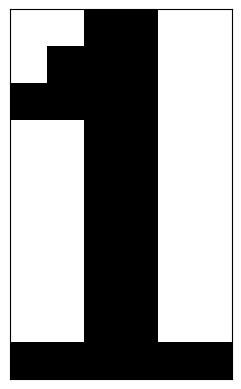

pattern 2


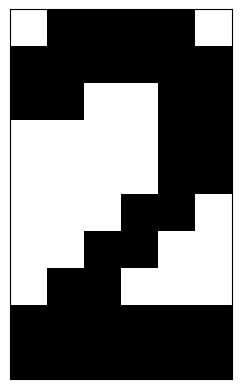

***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[ 0.03333333 -0.13333333  0.23333333]]


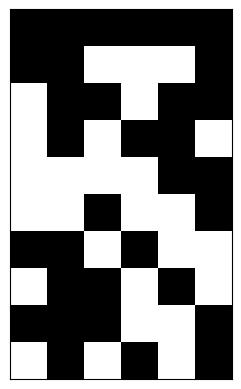

step 1, overlap [[0.2        0.16666667 1.        ]]


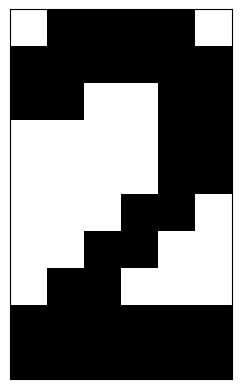

step 2, overlap [[0.2        0.16666667 1.        ]]


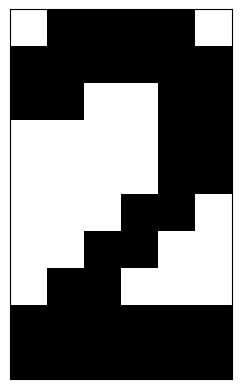

converged after 1 steps


In [7]:
# 2D model - random initial state
model2D = HopfieldModel2D(init="random")
model2D.show_patterns()
model2D.simulation()

***** MEMORIZED PATTERNS *****
pattern 0


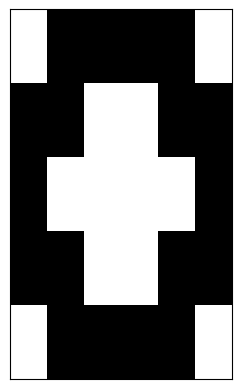

pattern 1


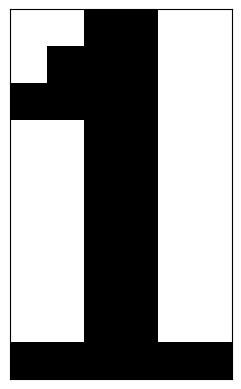

pattern 2


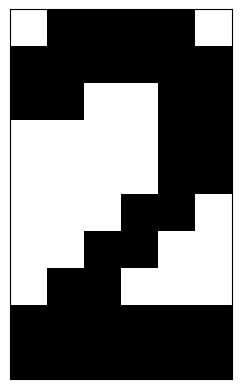

***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[-0.16666667  0.53333333  0.23333333]]


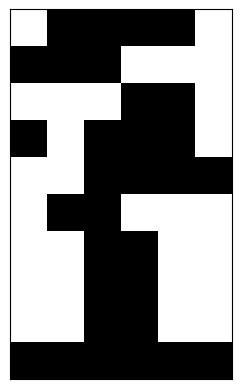

step 1, overlap [[-0.23333333  1.          0.16666667]]


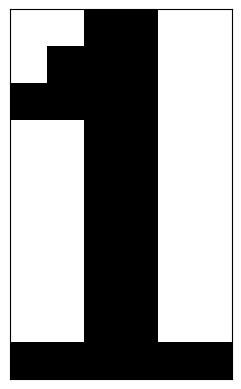

step 2, overlap [[-0.23333333  1.          0.16666667]]


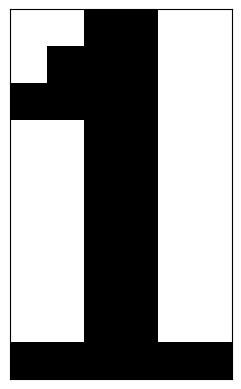

converged after 1 steps


In [7]:
# 2D model - initial state close to one of selected patterns
model2D = HopfieldModel2D()
model2D.show_patterns()
model2D.simulation()

In [19]:
# Monte Carlo simulations
exact0 = 0
exact1 = 0
exact2 = 0
inverted0 = 0
inverted1 = 0
inverted2 = 0
other = 0
for _ in range(10000):
    model = HopfieldModel2D(init="random")
    model.simulation()
    if (model.network.T[0] == model.patterns[:,0]).all():
        exact0 += 1
        print("EXACT0")
    elif (model.network.T[0] == model.patterns[:,1]).all():
        exact1 += 1
        print("EXACT1")
    elif (model.network.T[0] == model.patterns[:,2]).all():
        exact2 += 1
        print("EXACT2")
    elif (model.network.T[0] == -model.patterns[:,0]).all():
        inverted0 += 1
    elif (model.network.T[0] == -model.patterns[:,1]).all():
        inverted1 += 1
    elif (model.network.T[0] == -model.patterns[:,2]).all():
        inverted2 += 1
    else:
        other += 1

***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[-0.26666667  0.03333333  0.        ]]
step 1, overlap [[-1.          0.23333333 -0.2       ]]
step 2, overlap [[-1.          0.23333333 -0.2       ]]
converged after 1 steps
***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[-0.06666667 -0.23333333 -0.06666667]]
step 1, overlap [[ 0.23333333 -1.         -0.16666667]]
step 2, overlap [[ 0.23333333 -1.         -0.16666667]]
converged after 1 steps
***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[-0.06666667 -0.03333333  0.        ]]
step 1, overlap [[-1.          0.23333333 -0.2       ]]
step 2, overlap [[-1.          0.23333333 -0.2       ]]
converged after 1 steps
***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[ 0.06666667 -0.16666667  0.        ]]
step 1, overlap [[ 0.23333333 -1.         -0.16666667]]
step 2, overlap [[ 0.23333333 -1.         -0.16666667]]
converged after 1 steps
***** THE HOPFIELD MODEL SIMULATION *****
step 0, overlap [[-0.0

In [23]:
(exact0 + exact1 + exact2)/10000 # percentage of convergence to exact patterns

0.3696

In [24]:
(inverted0 + inverted1 + inverted2)/10000 # percentage of convergence to inverted patterns

0.3731

In [25]:
other/10000 # percentage of convergence to other states

0.2573